In [2]:
import pandas as pd

df = pd.read_csv("heart.csv")

# view data
print(df.head())

# target distribution
print("\nHeart Disease Count (num column):")
print(df['num'].value_counts())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  

Heart D

In [24]:
from sklearn.preprocessing import StandardScaler

X = df.drop('num', axis=1)
y = df['num']

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [25]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 3.1/72.0 MB 16.3 MB/s eta 0:00:05
   -- ------------------------------------- 4.7/72.0 MB 13.5 MB/s eta 0:00:05
   -- ------------------------------------- 5.0/72.0 MB 9.0 MB/s eta 0:00:08
   -- ------------------------------------- 5.0/72.0 MB 9.0 MB/s eta 0:00:08
   -- ------------------------------------- 5.0/72.0 MB 9.0 MB/s eta 0:00:08
   -- ------------------------------------- 5.2/72.0 MB 3.8 MB/s eta 0:00:18
   -- ------------------------------------- 5.2/72.0 MB 3.8 MB/s eta 0:00:18
   --- ------------------------------------ 5.5/72.0 MB 3.2 MB/s eta 0:00:21
   --- ------------------------------------ 6.0/72.0 MB 3.0 MB/s eta 0:00:22
   --- ------------------------------------ 6.3/72.0 MB 2.8 MB/s eta 0:00:24
   --- ---

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("🔥 Accuracy:", accuracy_score(y_test, pred)*100, "%")


🔥 Accuracy: 59.78260869565217 %


In [29]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Split X & y
X = df.drop('num', axis=1)
y = df['num']

# Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply SMOTE oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# XGBoost model
model = XGBClassifier(
    n_estimators=350,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("🚀 Improved Accuracy:", accuracy_score(y_test, pred)*100, "%")


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [31]:
# check missing values
print(df.isnull().sum())


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64


In [32]:
# Fill missing values with mean
df = df.fillna(df.mean())
print("Missing values handled successfully!")


Missing values handled successfully!


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Split X & y
X = df.drop('num', axis=1)
y = df['num']

# Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply SMOTE oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# XGBoost model
model = XGBClassifier(
    n_estimators=350,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("🚀 Improved Accuracy:", accuracy_score(y_test, pred)*100, "%")


🚀 Improved Accuracy: 85.40145985401459 %


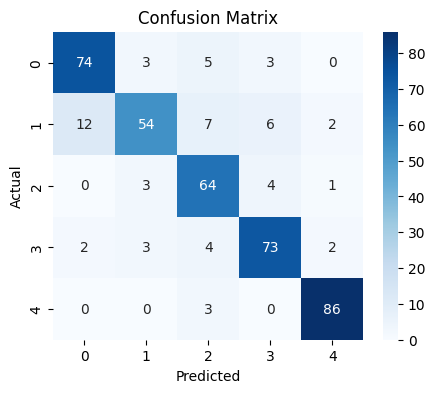


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        85
           1       0.86      0.67      0.75        81
           2       0.77      0.89      0.83        72
           3       0.85      0.87      0.86        84
           4       0.95      0.97      0.96        89

    accuracy                           0.85       411
   macro avg       0.85      0.85      0.85       411
weighted avg       0.86      0.85      0.85       411



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


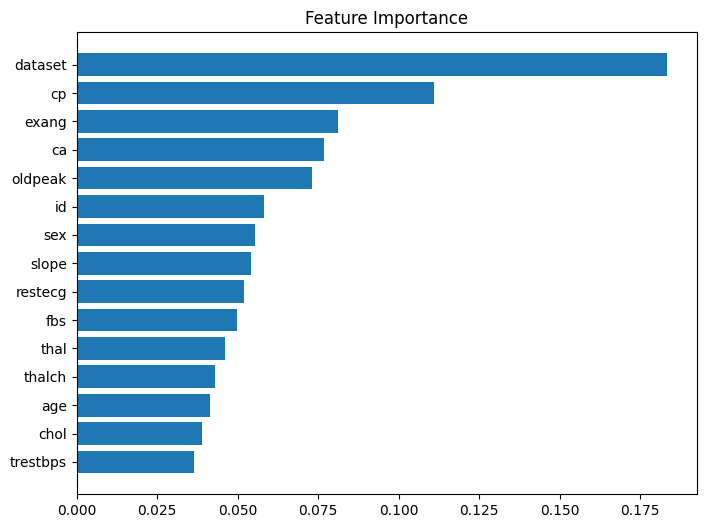

In [35]:
import numpy as np

importances = model.feature_importances_
columns = df.drop('num',axis=1).columns
idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(columns[idx], importances[idx])
plt.title("Feature Importance")
plt.show()
